# Assignment 4

Due date: Feb 28, 2018

Consider the file:

http://mdipierro.github.io/DePaul/CSC478/jobs.csv

It contains a subset of the jobs from Monster.com and listed here: https://www.kaggle.com/PromptCloudHQ/us-jobs-on-monstercom/data (I filtered only jobs with salary information).

The dataset contains job titles and corresponding salary information. The job title is a string and the salary is a single floating point number.
Use the first 1200 rows in the dataset as training set and the others as testing set.
- From the training set extract the vocabulary (list of words that appear in the job titles)
- What is the total number of distinct words?
- Compute the inverse document frequency of each world in the vocabulary as done in class.
- Show the top 10 and the bottom 10 words only.
- Select the 50 words with the highest idf (highest inverse frequency).
- Associate to each job 50 features corresponding to the tf-idf metric of those 50 words.
- Using those features, run the linear regression and try predict the salary of the rows in the testing set. Notice the vocabulary and the idf are always computed on the training set exclusively. The tf are computed on the each row (whether training ot testing set).
- What is the RMSE?
- Which words are associated to the highest salaries?
- Which words are associated to the lowest salaries?
(minor deviations from the specs are allowed as long as documented and justified)

In [577]:
import sklearn
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import re
from math import log
import numpy as np

# Use the first 1200 rows in the dataset as training set and the others as testing set.
# - From the training set extract the vocabulary (list of words that appear in the job titles)

In [578]:
cd

/Users/qiji


In [579]:
cd Downloads

/Users/qiji/Downloads


In [580]:
df=pd.read_csv('jobs.csv')

In [581]:
df_train, df_test = df.iloc[:1200], df.iloc[1200:]
print len(df_train), len(df_test)

1200 514


In [582]:
def read_row(doc):
    d={}
    rows=[row for row in range(len(doc))]
    for row in range(len(rows)):
        d[row]=doc.iloc[row]
    print len(d)
    return d

In [583]:
def read_titlecell(doc):
    d={}
    rows=[row for row in range(len(doc))]
    for row in range(len(rows)):
        d[row]=doc.iloc[row][0]
    print len(d)
    return d

In [584]:
train=read_row(df_train)

1200


In [586]:
def list_2_dict(row):
    d={}
    words=set(row)
    for word in words:
        d[word]=row.count(word)
    return d 

In [587]:
finder=re.compile('\w\w+')
titledict=[]
y=[]
for row in title:
    titledict.append(finder.findall(title[row].lower())) 
    y.append(df_train.iloc[row][1])
titledict=[list_2_dict(doc) for doc in titledict] 
words=reduce(lambda a,b: a|b,[set(doc.keys()) for doc in titledict]) 
#print titledict
#print sorted(words)
print len(words)
#print y

1441


# - What is the total number of distinct words?

In [588]:
len(words)

1441

the total number of distinct word is 1441

# - Compute the inverse document frequency of each world in the vocabulary as done in class.
# - Show the top 10 and the bottom 10 words only.
# - Select the 50 words with the highest idf (highest inverse frequency).

In [590]:
def compute_idf(titledict,words,min_frequency,n):
    idf={}
    for k,word in enumerate(words):
        d=0
        for row in titledict:
            if word in row:
                d=d+1
        if d>=min_frequency:
            idf[word]=log(len(titledict)/(1+d))
            #print k,word,idf[word]
    v=[[idf[word],word]for word in idf]
    v.sort()
    #print "top 10 : " ,v[:10]
    #print "bottom 10 :",v[-10:]
    words=[word for frequecy,word in v[-n:]]
    return idf,words

In [592]:
v.sort()
print "top 10: ",v[:10]
print "bottom 10: ",v[-10:]
#print idf

top 10:  [[0.0, 'in'], [0.0, 'job'], [1.0986122886681098, 'manager'], [2.0794415416798357, 'engineer'], [2.302585092994046, 'quality'], [2.5649493574615367, 'project'], [2.6390573296152584, 'senior'], [2.772588722239781, 'sales'], [2.833213344056216, 'accountant'], [2.995732273553991, 'columbus']]
bottom 10:  [[6.396929655216146, 'woodbridge'], [6.396929655216146, 'woonsocket'], [6.396929655216146, 'workers'], [6.396929655216146, 'workforce'], [6.396929655216146, 'wound'], [6.396929655216146, 'wrentham'], [6.396929655216146, 'wynnewood'], [6.396929655216146, 'yazoo'], [6.396929655216146, 'youngstown'], [6.396929655216146, 'yrs']]


the top 10 and the bottom 10 words are shown above

In [596]:
idf,words=compute_idf(titledict,words,0,50)

# - Associate to each job 50 features corresponding to the tf-idf metric of those 50 words.
# - Using those features, run the linear regression and try predict the salary of the rows in the testing set. Notice the vocabulary and the idf are always computed on the training set exclusively. The tf are computed on the each row (whether training ot testing set).
# - What is the RMSE?

In [598]:
X_train=np.ndarray((len(titledict),len(words)))
y_train=y
for i in range(len(titledict)):
    doc=titledict[i]
    for j in range(len(words)):
        word=words[j]
        idf_word=idf[word]
        #print idf_word
        tf=doc.get(word,0)
        #print doc      
        feature=tf*idf_word
        X_train[i,j]=feature
print X_train
#print y_train

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [599]:
# deal with test set

In [600]:
test=read_row(df_test)
title_test=read_titlecell(df_test)

514
514


In [601]:
finder=re.compile('\w\w+')
titledict_t=[]
y_t=[]
for row in title_test:
    titledict_t.append(finder.findall(title_test[row].lower())) 
    y_t.append(df_test.iloc[row][1])
titledict_t=[list_2_dict(doc) for doc in titledict_t] 
#print titledict_t
#print y_t

In [602]:
X_test=np.ndarray((len(titledict_t),len(words)))
y_test=y_t
for i in range(len(titledict_t)):
    doc=titledict_t[i]
    for j in range(len(words)):
        word=words[j]
        idf_word=idf[word]
        #print idf_word
        tf=doc.get(word,0)
        #print doc      
        feature=tf*idf_word
        X_test[i,j]=feature
print X_test
#print y_test

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [604]:
model = LinearRegression()
f=model.fit(X = X_train, y = y_train)
y_pred = model.predict(X_test)

In [605]:
import statsmodels.api as sm
results = sm.OLS(y_test, X_test).fit()

In [607]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.973
Date:                Tue, 27 Feb 2018   Prob (F-statistic):             0.0811
Time:                        14:48:24   Log-Likelihood:                -6329.9
No. Observations:                 514   AIC:                         1.267e+04
Df Residuals:                     509   BIC:                         1.269e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        n

In [608]:
rmse=(np.sum((y_pred - y_test)**2)/len(y_pred))**0.5

In [609]:
rmse

18854.802377917436

# RMSE= 18854.80

# - Which words are associated to the highest salaries?
# - Which words are associated to the lowest salaries?
# (minor deviations from the specs are allowed as long as documented and justified)

In my opinion, hightest salaries or lowest salaries may relat to regression positive highest coefficents and negative highest coeffcient of liearn regression respectly, So I use all words as feature to calculate coefficent of all words. the feature which has positive highest coeffcient are associated to the highest salaries,the feature has negative highest coeffcient are associated to the lowest salaries.
Also, correlation coefficent are associated to the highest salaries or the lowest salaries. If the correlation coefficent between salary and features are postive highest. it may related to highest salaries. If the correlation coefficent between salary and features are negative highest. it may related to lowest salaries. 

In [616]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [619]:
plt.scatter(model.predict(X_train),model.predict(X_train) - y_train,c='b',s=40,alpha=0.5)
plt.scatter(model.predict(X_test),model.predict(X_test) - y_test,c='g',s=40,alpha=0.5)


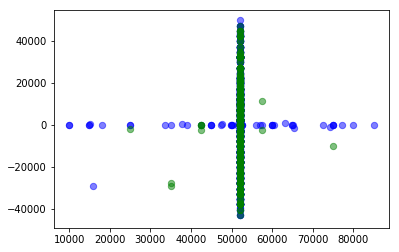

In [620]:
plt.show()

In [621]:
ws=reduce(lambda a,b: a|b,[set(doc.keys()) for doc in titledict]) 
print len(words1)

1441


In [622]:
def compute_idf(titledict,ws,min_frequency,n):
    idf_all={}
    for k,w in enumerate(ws):
        d=0
        for row in titledict:
            if w in row:
                d=d+1
        if d>=min_frequency:
            idf_all[w]=log(len(titledict)/(1+d))
            #print k,w,idf_all[w]
            #print idf_all[w],w
    v1=[[idf_all[w],w]for w in idf_all]
    v1.sort() 
    words1=[w for frequecy,w in v1[-n:]]
    return idf_all,words1

In [623]:
idf_all,words1=compute_idf(titledict,ws,0,1442)

In [661]:
X1_train=np.ndarray((len(titledict),len(words1)))
y1_train=y
for i in range(len(titledict)):
    doc=titledict[i]
    for j in range(len(words1)):
        w=words1[j]
        idf_allword=idf_all[w]
        #print idf_allword
        tf=doc.get(w,0)     
        feature1=tf*idf_allword
        X1_train[i,j]=feature1   
#print X1_train
#print y1_train

In [662]:
X1_test=np.ndarray((len(titledict_t),len(words1)))
y1_test=y_t
for i in range(len(titledict_t)):
    doc=titledict_t[i]
    for j in range(len(words1)):
        w_t=words1[j]
        idf_allword_t=idf_all[w_t]
        #print idf_word
        tf=doc.get(w_t,0)
        #print doc      
        feature_t=tf*idf_allword_t
        X1_test[i,j]=feature_t
        #print feature
#print X1_test
#print y1_test

In [649]:
model = LinearRegression()
f=model.fit(X = X1_train, y = y1_train)
y1_pred = model.predict(X1_test)

In [651]:
import statsmodels.api as sm
results1 = sm.OLS(y1_test, X1_test).fit()

In [652]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     13.44
Date:                Tue, 27 Feb 2018   Prob (F-statistic):           7.41e-56
Time:                        15:04:13   Log-Likelihood:                -5465.7
No. Observations:                 514   AIC:                         1.163e+04
Df Residuals:                     165   BIC:                         1.311e+04
Df Model:                         349                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.419e-11   8.91e-11      1.057      0.2

In [653]:
rmse1=(np.sum((y1_pred - y1_test)**2)/len(y1_pred))**0.5

In [654]:
rmse1

1.3727297056332109e+18

In [655]:
plt.scatter(model.predict(X1_train),model.predict(X1_train) - y1_train,c='b',s=5,alpha=0.5)
plt.scatter(model.predict(X1_test),model.predict(X1_test) - y1_test,c='g',s=5,alpha=0.5)

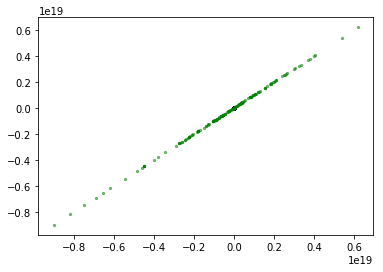

In [656]:
plt.show()

In [657]:
df1_train=pd.DataFrame(np.column_stack((y1_train,X1_train)))

In [658]:
df1_train.corr()

,0,1,2,3,4,5,6,7,8,9,...,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441
0,1.000000,NaN,NaN,-0.008054,0.103609,0.129225,1.830579e-02,0.067113,-0.092352,0.108683,...,0.048067,0.033461,-0.024966,-0.027157,0.011551,0.029809,-0.003056,-0.006708,-0.003056,-0.019123
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.008054,NaN,NaN,1.000000,-0.183181,0.008950,2.791630e-01,-0.080967,-0.052612,-0.144494,...,-0.017429,-0.017429,-0.017429,-0.017429,-0.017429,-0.017429,0.042671,-0.017429,-0.017429,-0.017429
4,0.103609,NaN,NaN,-0.183181,1.000000,0.369474,9.252448e-02,0.053491,-0.076952,-0.084298,...,-0.010168,-0.010168,-0.010168,-0.010168,-0.010168,0.071177,-0.010168,-0.010168,-0.010168,-0.010168
5,0.129225,NaN,NaN,0.008950,0.369474,1.000000,-6.645859e-02,-0.015016,-0.075157,-0.073549,...,-0.008872,-0.008872,-0.008872,-0.008872,-0.008872,0.076296,-0.008872,-0.008872,-0.008872,-0.008872
6,0.018306,NaN,NaN,0.279163,0.092524,-0.066459,1.000000e+00,-0.013927,-0.055321,-0.039637,...,-0.007942,-0.007942,-0.007942,-0.007942,-0.007942,-0.007942,-0.007942,-0.007942,-0.007942,-0.007942
7,0.067113,NaN,NaN,-0.080967,0.053491,-0.015016,-1.392697e-02,1.000000,-0.066258,0.317548,...,-0.007821,0.106636,-0.007821,-0.007821,-0.007821,-0.007821,-0.007821,-0.007821,-0.007821,-0.007821
8,-0.092352,NaN,NaN,-0.052612,-0.076952,-0.075157,-5.532126e-02,-0.066258,1.000000,-0.058576,...,-0.007066,-0.007066,-0.007066,-0.007066,-0.007066,-0.007066,-0.007066,-0.007066,-0.007066,-0.007066
9,0.108683,NaN,NaN,-0.144494,-0.084298,-0.073549,-3.963698e-02,0.317548,-0.058576,1.000000,...,-0.006914,-0.006914,-0.006914,-0.006914,-0.006914,-0.006914,-0.006914,-0.006914,-0.006914,-0.006914


In [659]:
df1_test=pd.DataFrame(np.column_stack((y1_test,X1_test)))

In [660]:
df1_test.corr()

,0,1,2,3,4,5,6,7,8,9,...,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441
0,1.000000,NaN,NaN,0.005393,0.030554,0.056485,-0.001150,0.185956,-0.317001,0.186645,...,NaN,NaN,0.040220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.005393,NaN,NaN,1.000000,-0.139305,0.069108,0.010880,-0.205119,-0.154838,-0.244650,...,NaN,NaN,-0.042462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.030554,NaN,NaN,-0.139305,1.000000,-0.025085,0.067576,-0.078264,-0.061006,-0.083118,...,NaN,NaN,-0.014426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.056485,NaN,NaN,0.069108,-0.025085,1.000000,-0.010771,-0.036849,-0.041007,-0.039135,...,NaN,NaN,-0.006792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.001150,NaN,NaN,0.010880,0.067576,-0.010771,1.000000,-0.033606,0.020852,0.026495,...,NaN,NaN,-0.006194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.185956,NaN,NaN,-0.205119,-0.078264,-0.036849,-0.033606,1.000000,-0.127938,0.540206,...,NaN,NaN,-0.021192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-0.317001,NaN,NaN,-0.154838,-0.061006,-0.041007,0.020852,-0.127938,1.000000,-0.135873,...,NaN,NaN,-0.023583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.186645,NaN,NaN,-0.244650,-0.083118,-0.039135,0.026495,0.540206,-0.135873,1.000000,...,NaN,NaN,-0.022506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
